- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - カスタムメトリック

In [7]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
import xgboost as xgb

In [9]:
def feval_accuracy(pred_proba, dtrain):
    y_true = dtrain.get_label().astype(int)
    y_pred = np.where(pred_proba > 0.5, 1, 0)
    acc = accuracy_score(y_true, y_pred)
    return 'accuracy', 1 - acc # Name and value

In [10]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [11]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [12]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                feval=feval_accuracy)

[0]	train-logloss:0.46240	eval-logloss:0.49290	train-accuracy:0.01759	eval-accuracy:0.07018
Multiple eval metrics have been passed: 'eval-accuracy' will be used for early stopping.

Will train until eval-accuracy hasn't improved in 10 rounds.
[1]	train-logloss:0.33344	eval-logloss:0.37602	train-accuracy:0.01005	eval-accuracy:0.06433
[2]	train-logloss:0.24974	eval-logloss:0.30837	train-accuracy:0.01256	eval-accuracy:0.06433
[3]	train-logloss:0.19168	eval-logloss:0.26162	train-accuracy:0.01256	eval-accuracy:0.07018
[4]	train-logloss:0.15087	eval-logloss:0.22837	train-accuracy:0.01256	eval-accuracy:0.07018
[5]	train-logloss:0.12011	eval-logloss:0.20208	train-accuracy:0.01256	eval-accuracy:0.07018
[6]	train-logloss:0.09615	eval-logloss:0.17614	train-accuracy:0.00502	eval-accuracy:0.07018
[7]	train-logloss:0.07942	eval-logloss:0.16177	train-accuracy:0.00502	eval-accuracy:0.05848
[8]	train-logloss:0.06669	eval-logloss:0.15044	train-accuracy:0.00502	eval-accuracy:0.06433
[9]	train-logloss:0.0

In [13]:
y_pred_proba = bst.predict(dtest)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9532163742690059


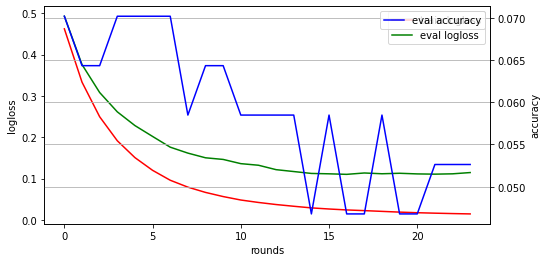

In [17]:
_, ax1 = plt.subplots(figsize=(8, 4))

train_metric = evals_result['train']['logloss']
ax1.plot(train_metric, label='train logloss', c='r')

eval_metric = evals_result['eval']['logloss']
ax1.plot(eval_metric, label='eval logloss', c='g')

ax1.set_ylabel('logloss')
ax1.legend()
ax1.set_xlabel('rounds')


ax2 = ax1.twinx()

eval_custom_metric = evals_result['eval']['accuracy']
ax2.plot(eval_custom_metric, label='eval accuracy', c='b')

ax2.set_ylabel('accuracy')
ax2.legend()


plt.grid()
plt.show()